In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (18.6 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
def extract_blue_stamps(image_path):

    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([140, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

In [ ]:

def extract_signatures(image_path):

    image = cv2.imread(image_path, 0)
    _, binary = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((2, 2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

    return binary

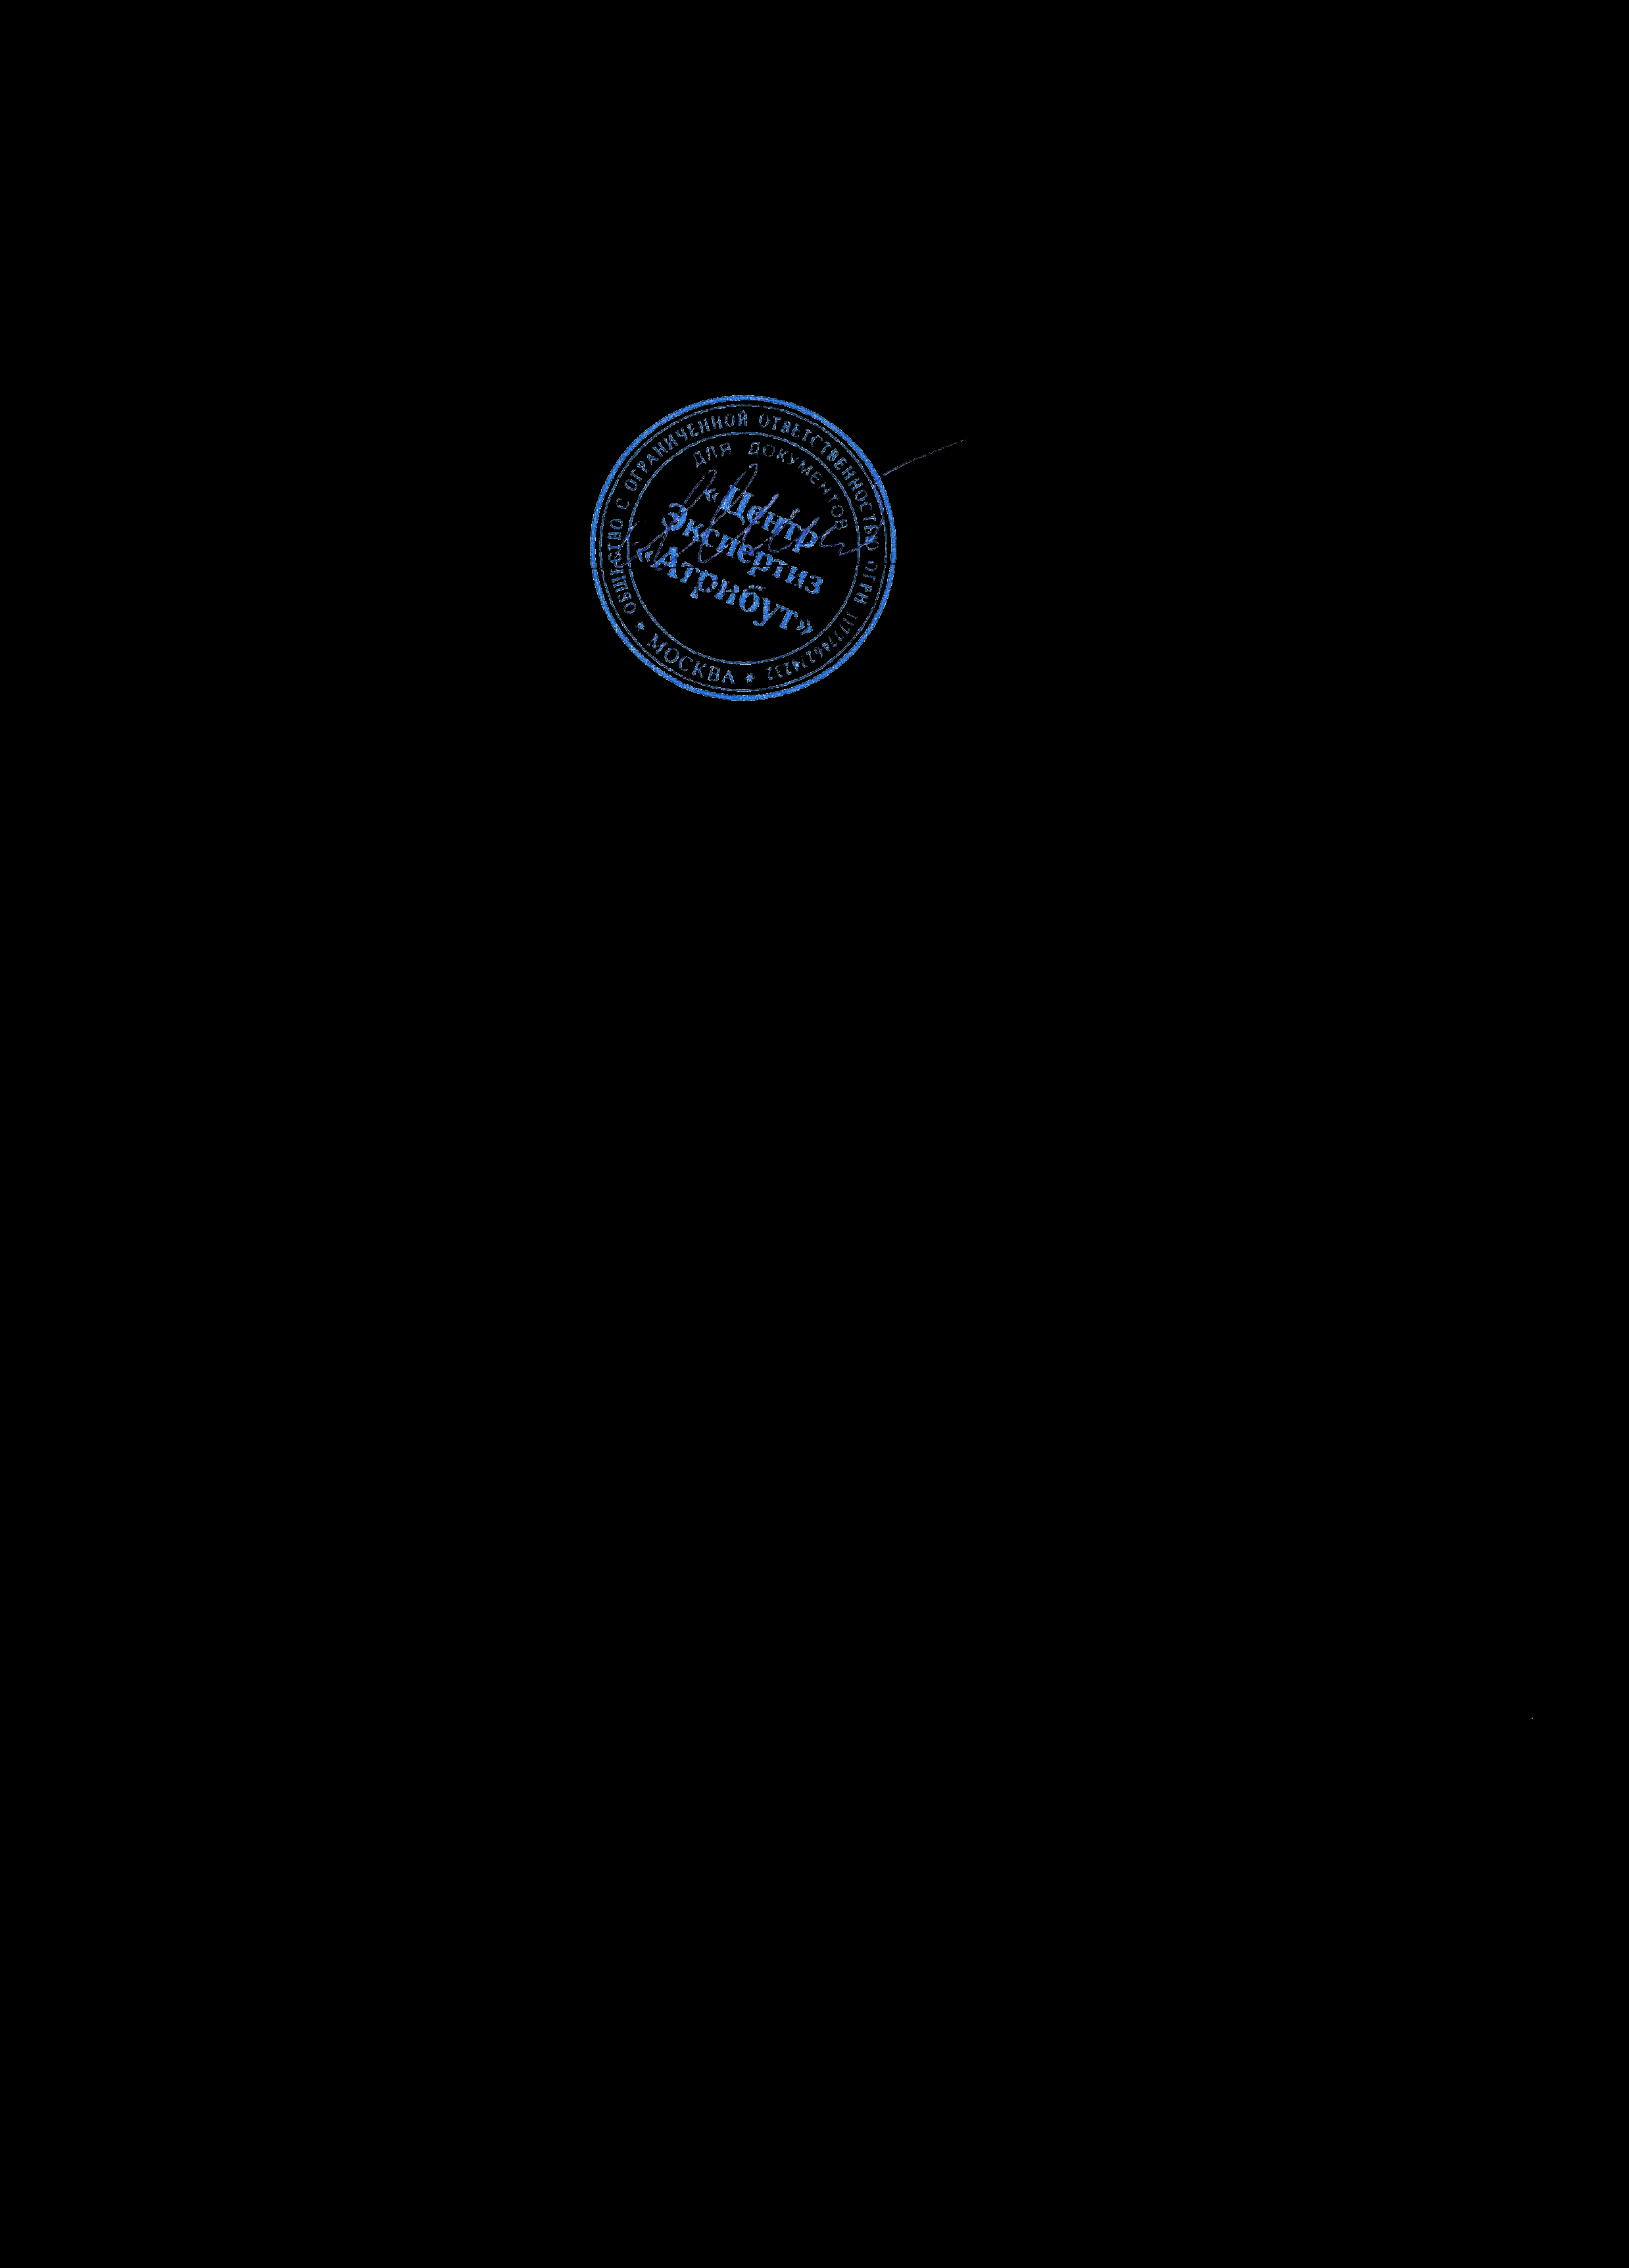

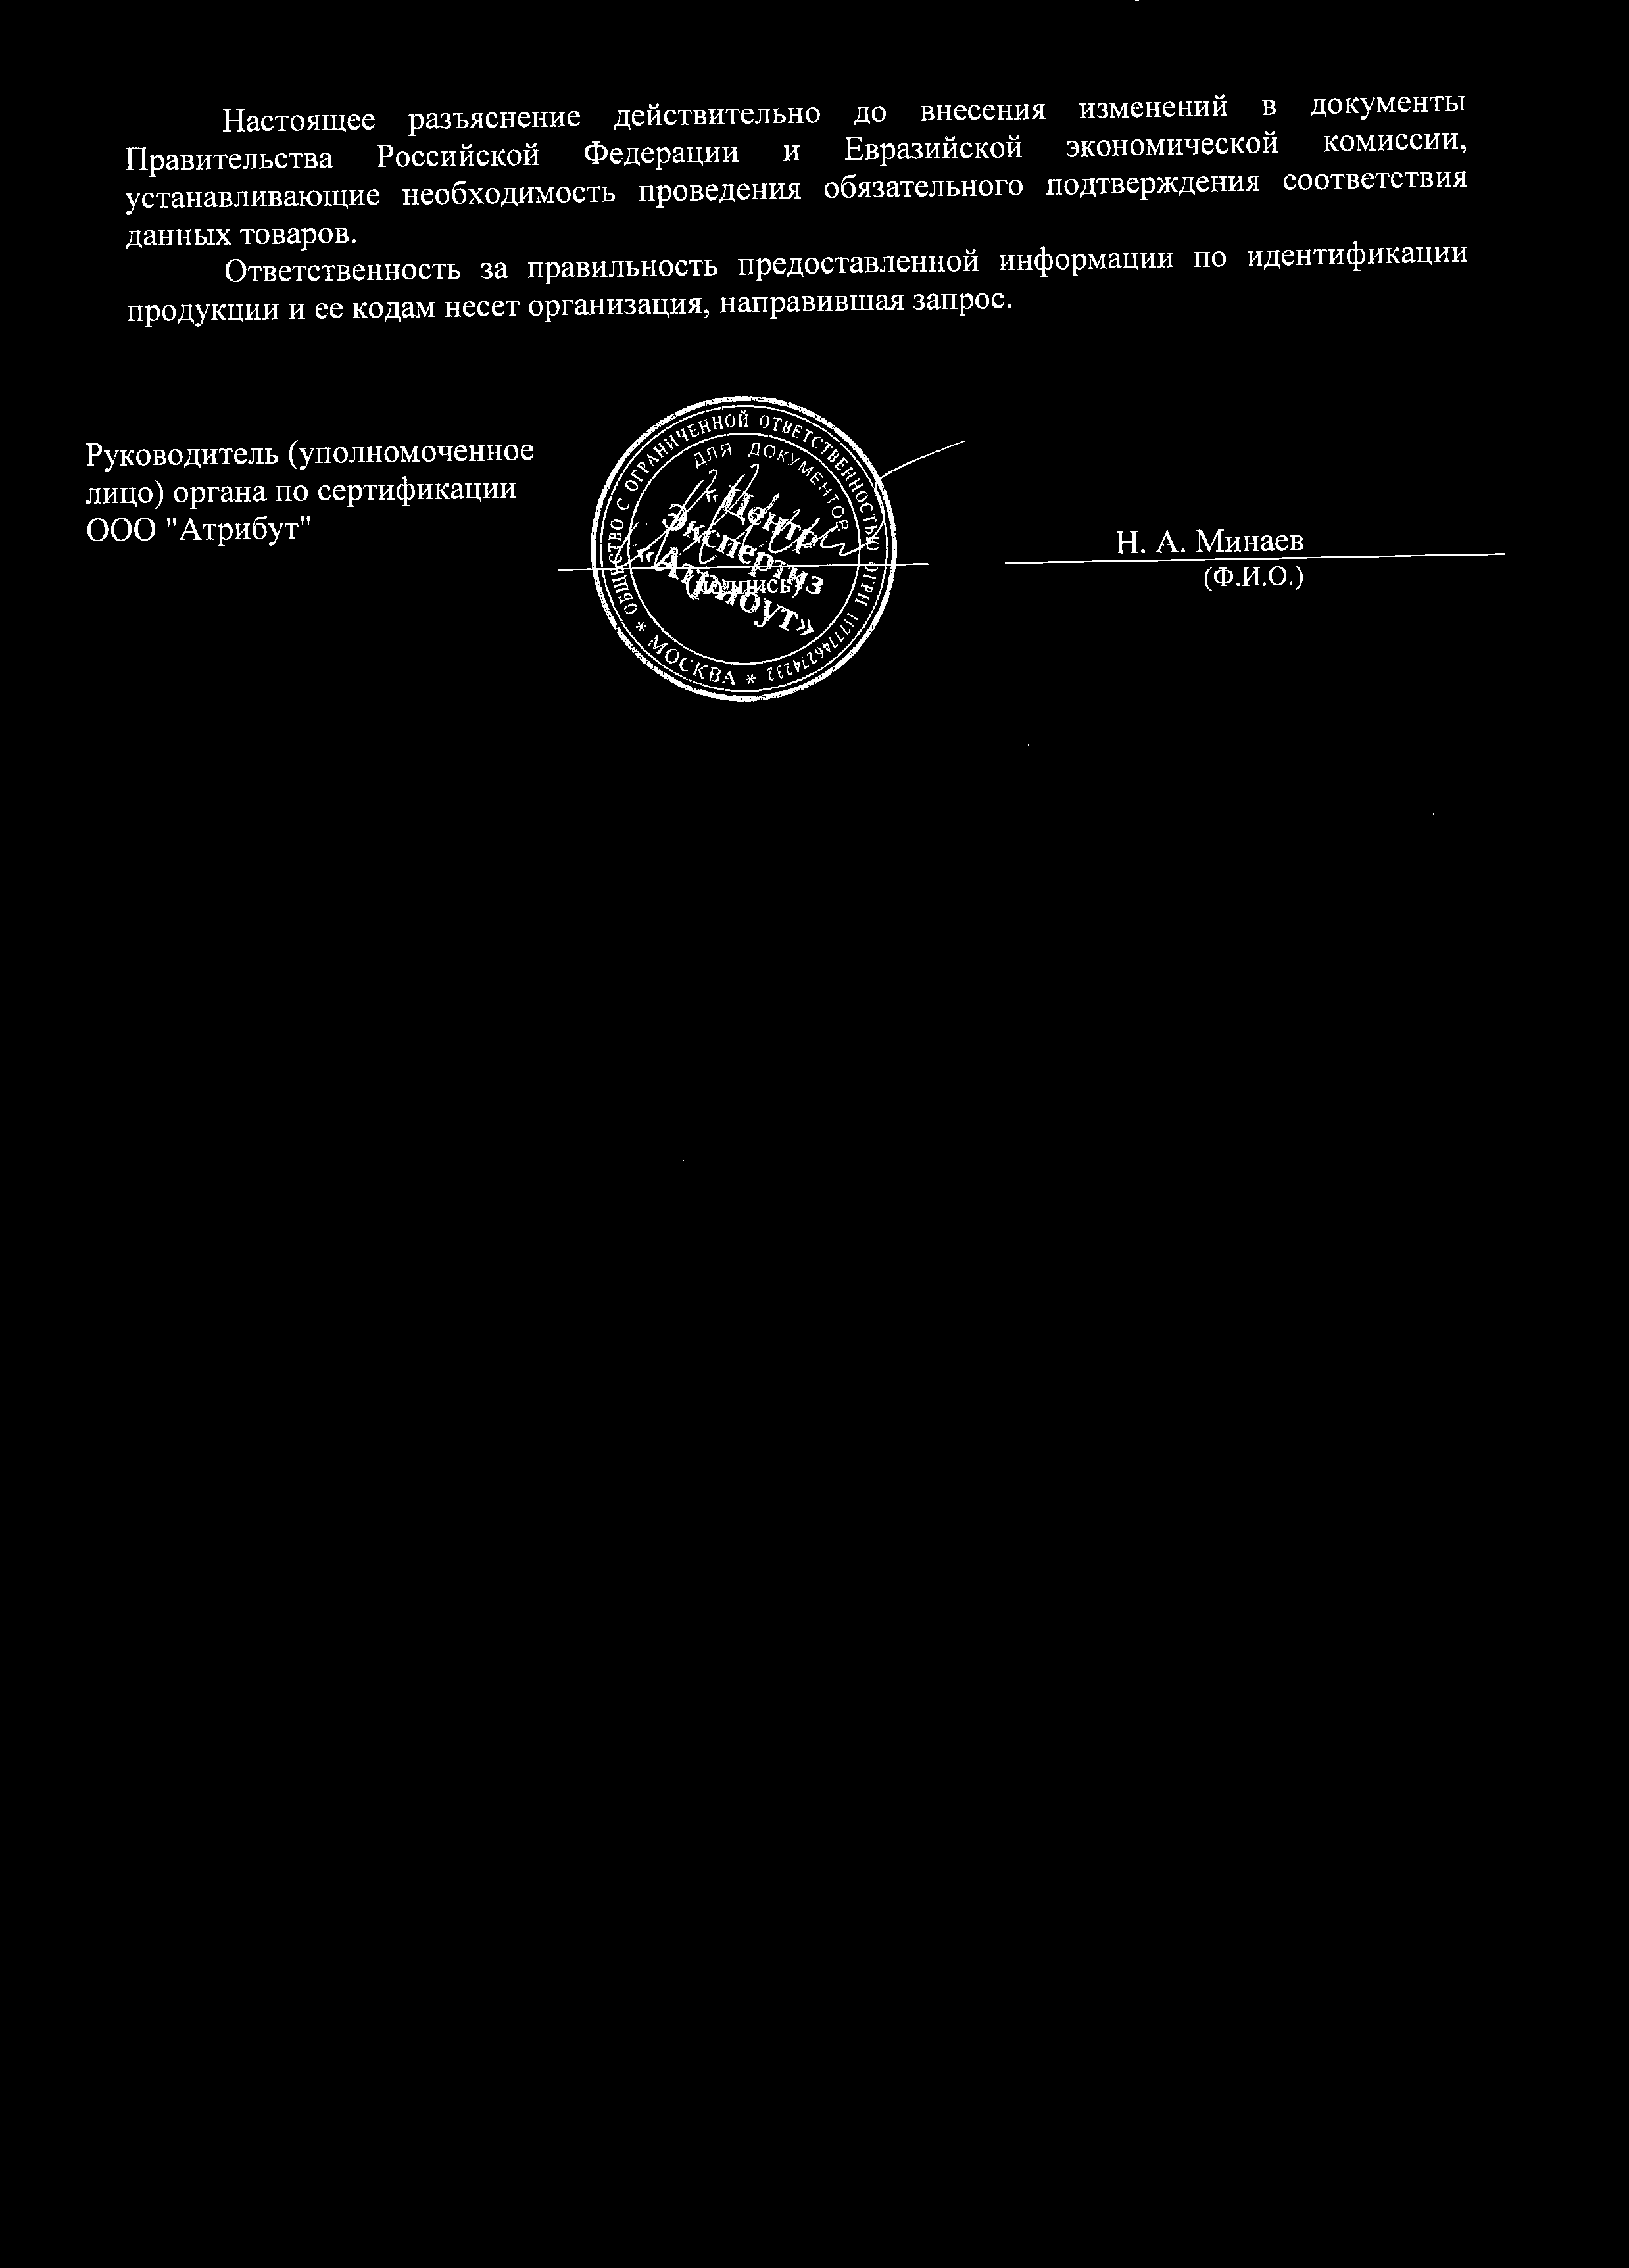

In [ ]:

from google.colab.patches import cv2_imshow
image_path = '/content/Informatsionnoe-otkaznoe-pismo-po-filtr-meshochkam.-List-2 (1).jpeg'
blue_stamps = extract_blue_stamps(image_path)
signatures = extract_signatures(image_path)

cv2_imshow(blue_stamps)
cv2_imshow(signatures)


In [ ]:
def extract_blue_stamps(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    result = cv2.bitwise_and(image, image, mask=mask)

    return result


In [ ]:

def extract_signatures(image_path):
    image = cv2.imread(image_path, 0)
    _, binary = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((2, 2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

    return binary



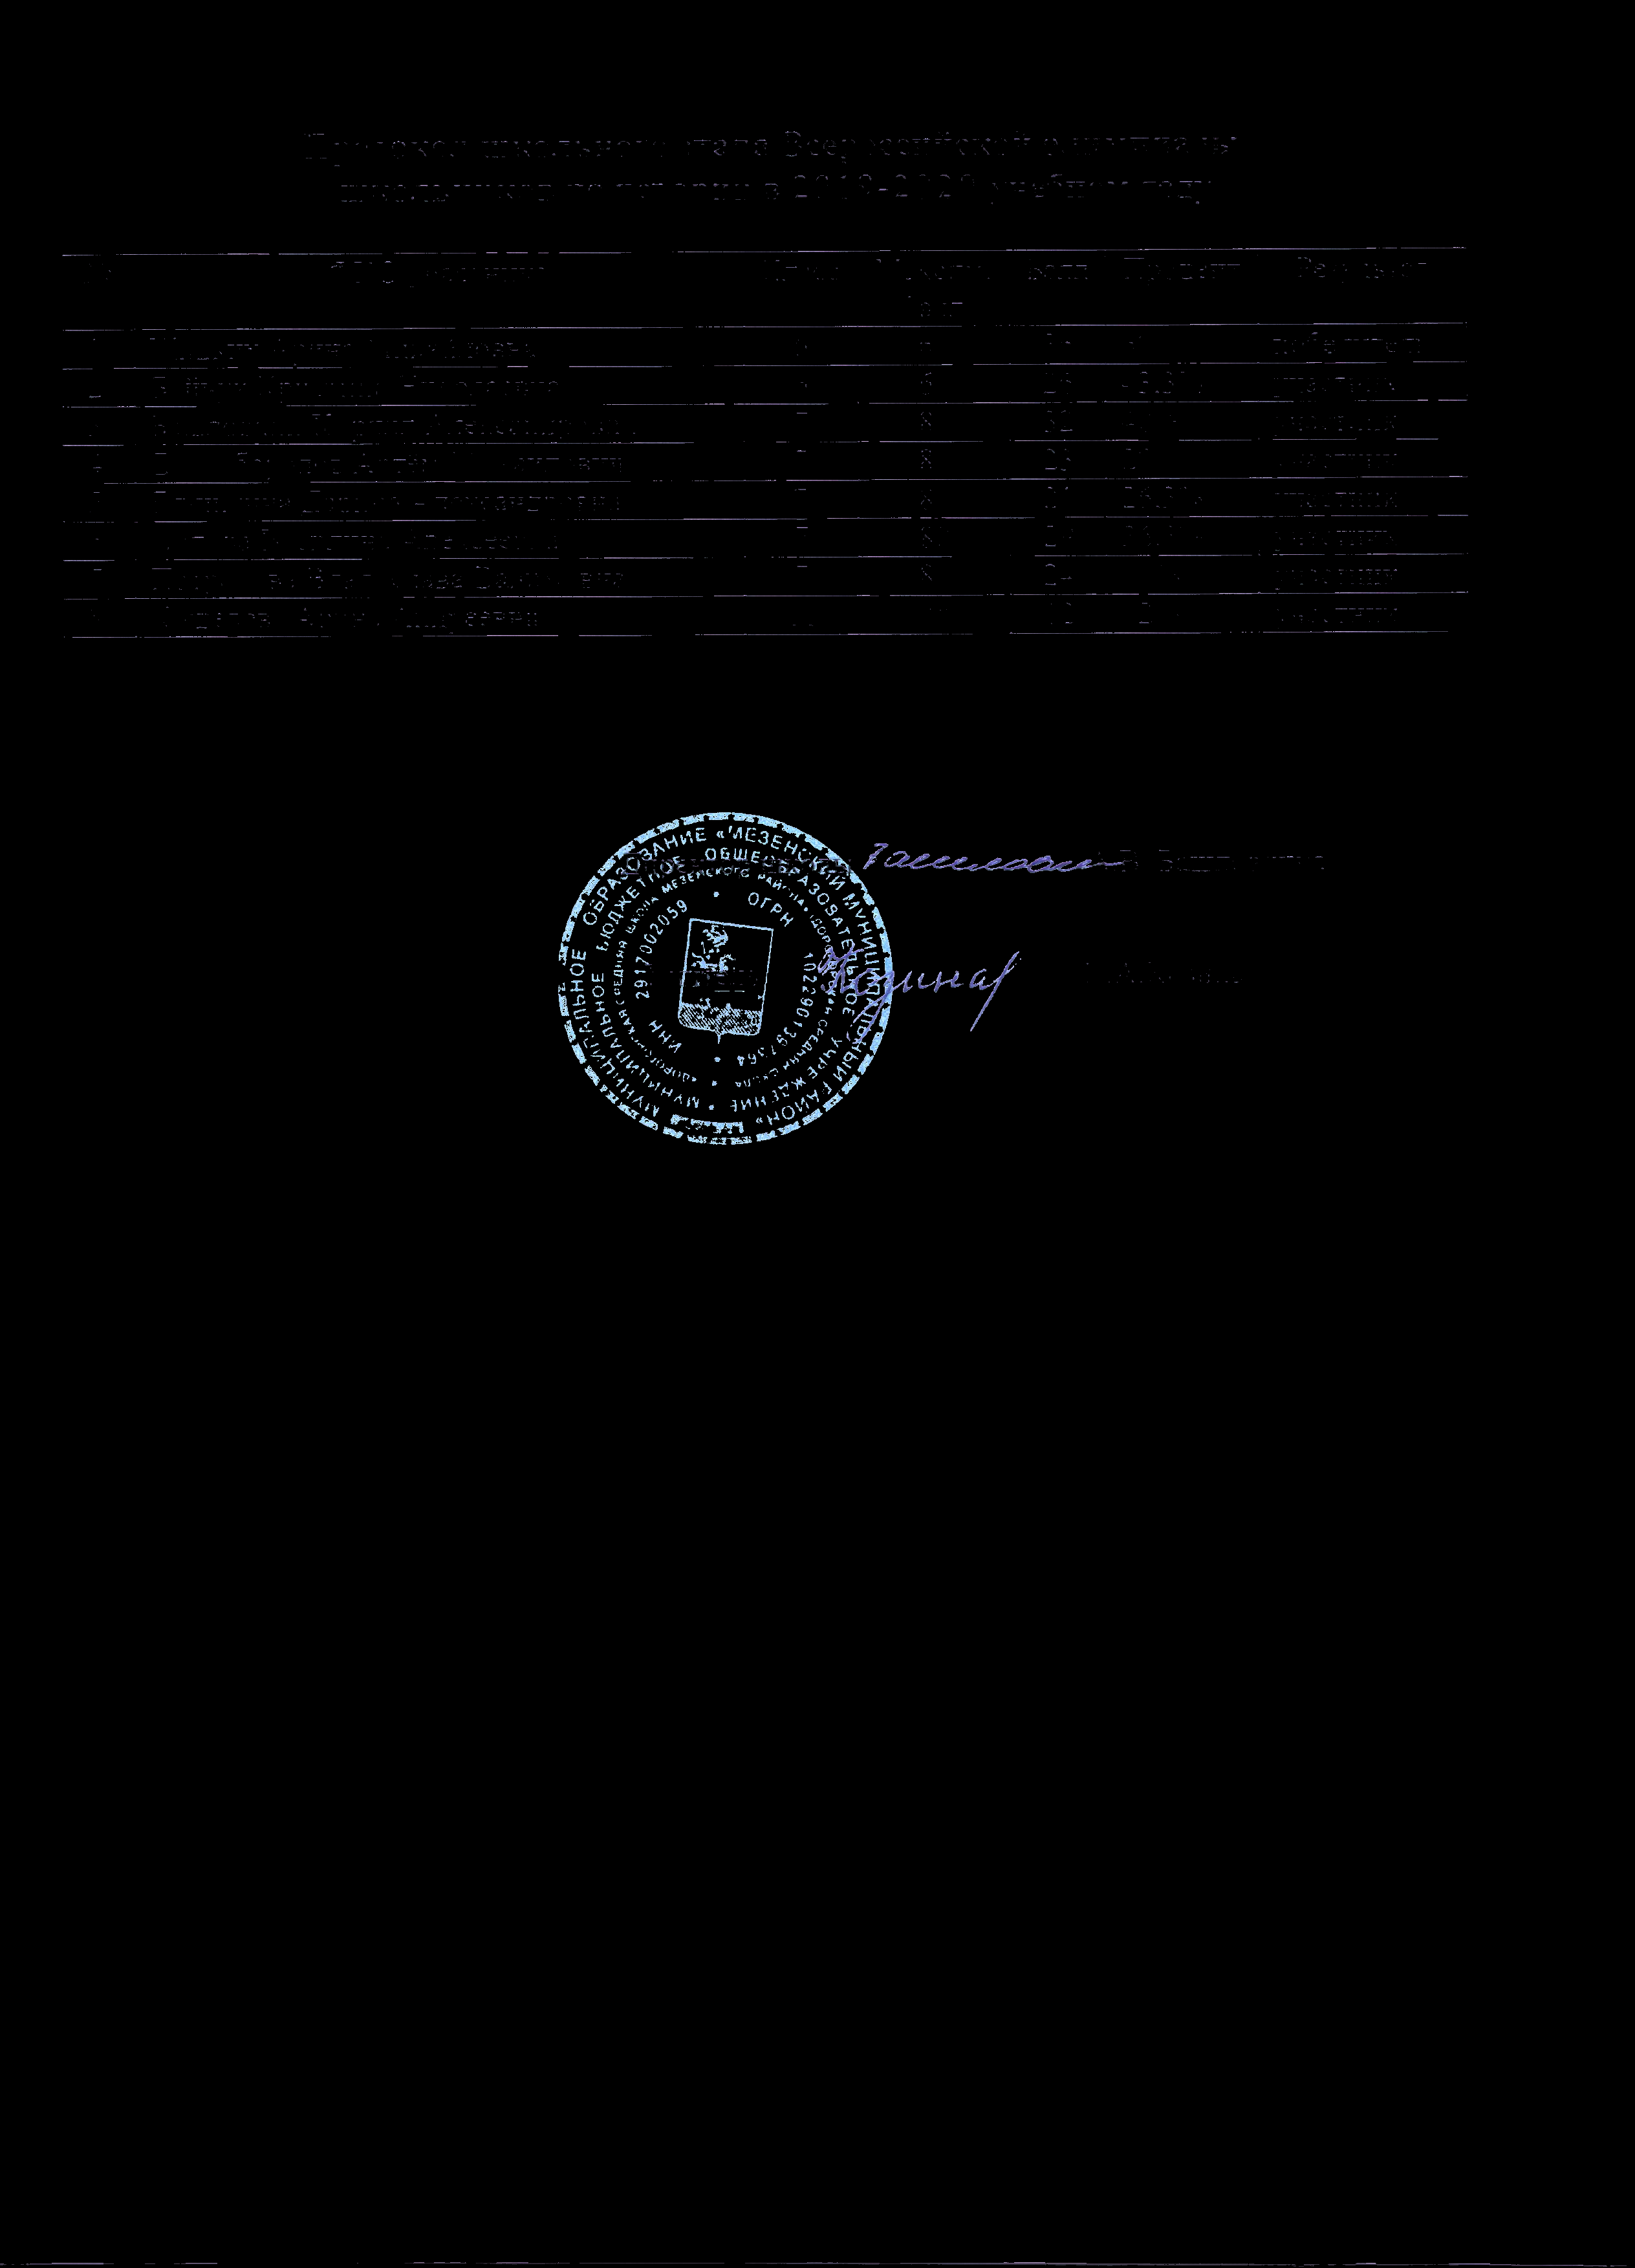

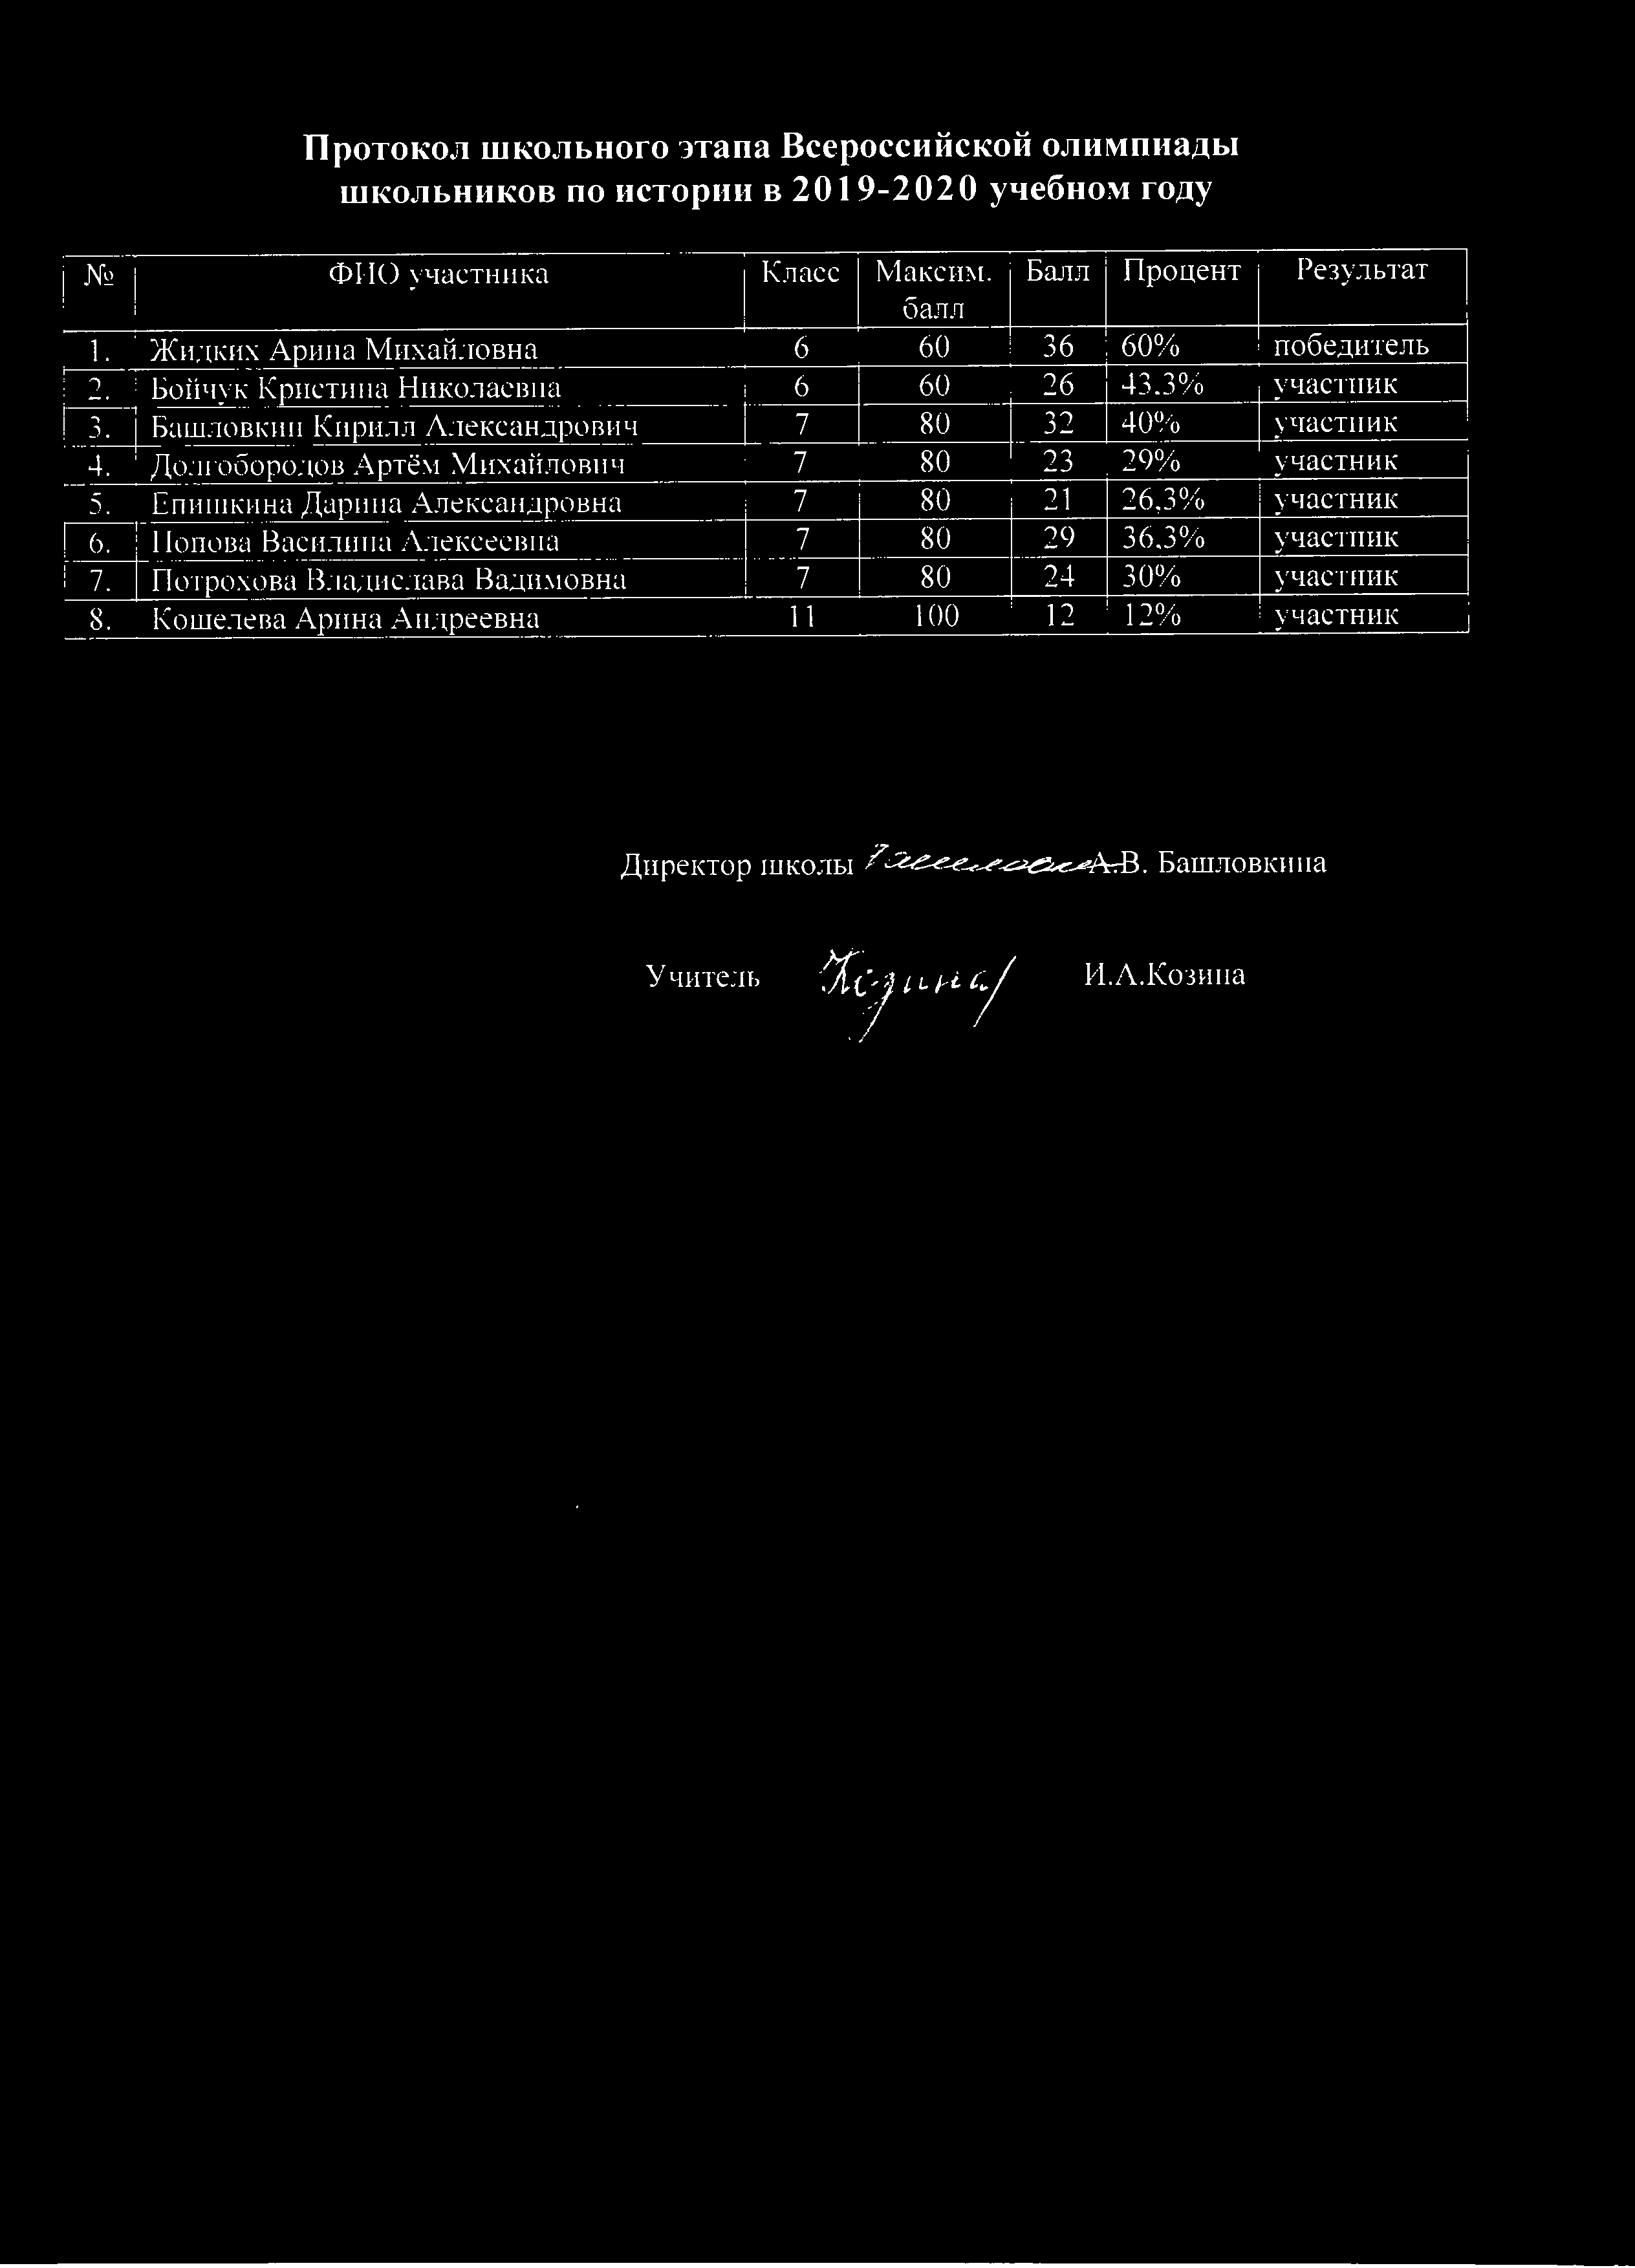

Extracted Text from Stamp:



In [ ]:
image_path = '/content/istoriya.jpg'
blue_stamps = extract_blue_stamps(image_path)
signatures = extract_signatures(image_path)

cv2_imshow(blue_stamps)
cv2_imshow(signatures)

gray_stamp = cv2.cvtColor(blue_stamps, cv2.COLOR_BGR2GRAY)

_, thresh_stamp = cv2.threshold(gray_stamp, 150, 255, cv2.THRESH_BINARY_INV)

extracted_text = pytesseract.image_to_string(thresh_stamp)

print("Extracted Text from Stamp:")
print(extracted_text)